In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
lowrankdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top10/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{lowrankdir}/{sub}_task-resttop10_fc.npy')
        n = np.load(f'{lowrankdir}/{sub}_task-nbacktop10_fc.npy')
        e = np.load(f'{lowrankdir}/{sub}_task-emoidtop10_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


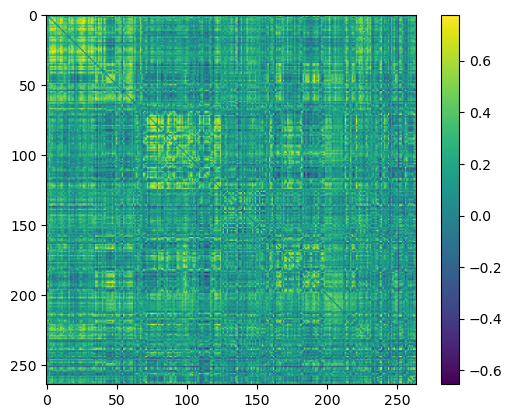

In [3]:
import matplotlib.pyplot as plt

plt.imshow(restmat[0])
plt.colorbar()
plt.show()

In [4]:
# Get summary measures

netbounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 265]

def relbounds(mats, subi, r1a, r1b, r2a, r2b, sum=np.mean):
    mat = mats[subi]
    a = sum(mat[netbounds[r1a]:netbounds[r1a+1],netbounds[r1b]:netbounds[r1b+1]])
    b = sum(mat[netbounds[r2a]:netbounds[r2a+1],netbounds[r2b]:netbounds[r2b+1]])
    return a/b

def absbounds(mats, subi, r1, r2, sum=np.mean):
    mat = mats[subi]
    s = sum(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return s

def varbounds(mats, subi, r1, r2, var=np.var):
    mat = mats[subi]
    v = var(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return v

def varbound(mats, subi, var=np.var):
    mat = mats[subi]
    v = var(mat)
    return v

print(absbounds(restmat, 6, 4, 4))
print(varbounds(restmat, 6, 4, 4))
print(relbounds(restmat, 6, 0, 4, 4, 4))
print(varbound(restmat, 6))

0.3844883961700917
0.10935044918143791
0.8574242880920223
0.07976432485535861


In [5]:
# Get age regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

agew = []
agei = []
keep = 5000

for i in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([age, age, age])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, train_size=300)
    
    reg = Ridge(alpha=100).fit(xtr, ytr)
    w = reg.coef_
    i = reg.intercept_

    ww = np.zeros(34716)
    ww[mask] = w
    
    agew.append(ww)
    agei.append(i)

print(agew)
print(agei)

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.02290666]), array([-0.00136805,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0.        , 0.06097722, 0.        , ..., 0.        , 0.01091233,
       0.        ]), array([0.        , 0.        , 0.01724628, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.06030984]), array([ 0.       ,  0.       , -0.0041714, ...,  0.       ,  0.       ,
        0.       ]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        , -0.00732695,  0.        , ...,  0.        ,
        0.09072429,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.])]
[15.144013996362705, 14.044368911401051, 13.783490971539639, 14.736847993389478, 14.355225013776355, 15.382038934520768, 14.630165469962067, 14.863814103994724, 15.662825893518514, 14.165185827623139]


In [6]:
# Get sex regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sexw = []
sexi = []
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([sex, sex, sex])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, stratify=inpy, train_size=300)
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w
    
    sexw.append(ww)
    sexi.append(i)
    print(f'Done {ii}')

print(sexw)
print(sexi)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([ 0.18327552, -0.010383  ,  0.        , ...,  0.        ,
        0.        ,  0.03926475]), array([ 0.        ,  0.        , -0.04862921, ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        ,  0.        , -0.01563442, ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.38019636, 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.])]
[-5.982441067470985, -2.7066432135195386, -0.43702532698226554, -3.1930714904986885, -3.9056274813561775, -3.624515176345218, -6.691910836716556, 0.013831739457766978, -2.33827931631584, -3.505418535056788]


In [7]:
# Get race regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

racew = []
racei = []
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([race, race, race])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, stratify=inpy, train_size=300)
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w
    
    racew.append(ww)
    racei.append(i)
    print(f'Done {ii}')

print(racew)
print(racei)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0.        , 0.        , 0.053956  , ..., 0.01345443, 0.        ,
       0.        ]), array([ 0.        , -0.01852041, -0.12740258, ...,  0.1267011 ,
        0.        ,  0.        ]), array([-0.01903323,  0.        ,  0.        , ..., -0.07895678,
        0.        ,  0.        ]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.09339786]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.21308874]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.22542994,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.02230166, 0.        , ..., 0.        , 0.        ,
       0.        ])]
[8.841474888219729, 9.66779464106277, 8.854268288489656, 10.736569620352606, 8.345192388318626, 11.165665735228066, 5.728731114947309, 4.370745265242635

In [8]:
# Get rest classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

restw = []
resti = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.ones(N), np.zeros(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    restw.append(ww)
    resti.append(i)
    print(f'Done {ii}')

print(restw)
print(resti)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0.        , 0.        , 0.        , ..., 0.20482354, 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([-0.0114925,  0.       ,  0.       , ...,  0.       ,  0.       ,
        0.       ]), array([ 0.        ,  0.        , -0.12135059, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.        , -0.19612153,  0.        , ...,  0.17082949,
        0.        , -0.06045617]), array([ 0.        , -0.13580165,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0.01887979, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0.00030696, 0.        , 0.        , ..., 0.2982412 , 0.        ,
       0.        ])]
[-5.183474366151333, -1.7173609805930141, -5.303412287497722, -5.2205366259135415, -1.6913874625015033, -1.7532931417629447, -3.501180899401189, 0

In [9]:
# Get nback classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

nbackw = []
nbacki = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.ones(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    nbackw.append(ww)
    nbacki.append(i)
    print(f'Done {ii}')

print(nbackw)
print(nbacki)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0., 0., 0., ..., 0., 0., 0.]), array([-0.22493775,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([-0.28563271,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.09326253,
       0.        ]), array([ 0.        ,  0.        ,  0.        , ..., -0.10822375,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.13841471, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.])]
[0.08167603013975896, 2.769809938046387, 0.0018994352825675493, 1.6113592745663516, -0.007712605984374647, 2.1447818474635443, 1.9134368230813386, 1.0158644209061163, 1.7608983508238938, -0.04280202470693315]


In [10]:
# Get emoid classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

emoidw = []
emoidi = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.zeros(N), np.ones(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    emoidw.append(ww)
    emoidi.append(i)
    print(f'Done {ii}')

print(emoidw)
print(emoidi)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.28417329, -0.12805534,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.        ,  0.        , -0.04974142, ..., -0.02488281,
        0.        ,  0.        ]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.31305449]), array([0.       , 0.       , 0.1585193, ..., 0.       , 0.       ,
       0.1081697]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.09219999, 0.        ,
       0.05151697]), array([ 0.        , -0.01336747,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.20570273,  0.        ,  0.        , ..., -0.21243356,
        0.        ,  0.10516116])]
[-8.413234978424434, -7.391657627392334, -7.433890155193225, -8.584124898862425, -10.542606501365025, -7.4917724580344, -5.309371918648458, -11.06

In [13]:
def get_tgts(fc, w, i):
    res = []
    a,b = np.triu_indices(264,1)
    fc = fc[a,b]
    for ww,ii in zip(w, i):
        res.append(fc@ww+ii)
    return res

mat = restmat
subi = 0
nreg = 5

print('Age', get_tgts(mat[subi], agew[:nreg], agei[:nreg]))
print('Sex', get_tgts(mat[subi], sexw[:nreg], sexi[:nreg]))
print('Race', get_tgts(mat[subi], racew[:nreg], racei[:nreg]))
print('Rest', get_tgts(mat[subi], restw[:nreg], resti[:nreg]))
print('Nback', get_tgts(mat[subi], nbackw[:nreg], nbacki[:nreg]))
print('Emoid', get_tgts(mat[subi], emoidw[:nreg], emoidi[:nreg]))

Age [14.856179166725957, 15.900388642809117, 14.002385104448143, 14.7414593804919, 14.523621949135157]
Sex [-6.701368593076509, -0.02019545802264755, 0.8964434286263954, 4.021786954748835, -7.31423239064717]
Race [3.754972379152094, 1.6456429879561458, 3.3264937385290914, 3.761708191573036, 1.0137248007177355]
Rest [4.254742129898314, 6.3797312140185385, 7.91405305745389, 2.408423721205815, 1.6599692348729564]
Nback [0.12151532824614053, -0.25275906325674913, -8.321858452719912, -1.488351223784947, -4.584198657944778]
Emoid [-15.55650974656999, -12.067883585295666, -15.427158546979367, -9.075887062332221, -19.52795600824303]


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import itertools
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.fc1 = nn.Linear(34716, 20).float().cuda()
        self.fc2 = nn.Linear(20,1).float().cuda()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x).squeeze()
        x = torch.stack([-x, x], dim=1)
        return x

d = D()
d.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/Work/Imputation/disc7.torch'))

class FC(nn.Module):
    def __init__(self, n, reg_w, reg_i, reg_tgt,):
        super(FC, self).__init__()
        self.x = nn.Parameter(0.1*torch.randn(n,264,10).float().cuda())
        self.reg_w = [torch.from_numpy(w).float().cuda() for w in reg_w]
        self.reg_i = reg_i
        self.reg_tgt = reg_tgt

    def getfc(self, fake=None):
        if fake is None:
            x = torch.einsum('nai,nbi->nab', self.x, self.x)
        else:
            x = torch.from_numpy(fake).tile(len(self.x), 1, 1).float().cuda()
            print(x.shape)
        return x

    def getvecfc(self, x):
        a,b = torch.triu_indices(264,264,offset=1)
        return x[:,a,b]

    def getfcnp(self):
        with torch.no_grad():
            x = self.getfc()
        x = x.detach().cpu().numpy()
        m = np.max(np.abs(x))
        if m > 1:
            return x/m
        return x

    def get_prednp(self):
        res = []
        with torch.no_grad():
            x = self.getfc()
            y = self.getvecfc(x)
            for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
                r = y@w+i
                res.append(r.detach().cpu().numpy())
        return np.stack(res)

    def forward(self, mfc, vfc, ab, ab_tgts, vb, vb_tgts, fake_tgt, fake=None):
        x = self.getfc(fake)
        x[torch.isnan(x)] = 0.01
        y = self.getvecfc(x)
        loss = 0
        loss += 0.1*rmse(mfc, torch.mean(x, axis=(1,2)))
        loss += torch.mean(torch.exp(torch.abs(x)**10))
        fake = d(y)
        loss += 5*rmse(fake_tgt, fake[:,1])
        for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
            loss += 0.1*rmse(tgt, y@w+i)
        for i in range(len(x)):
            v = varbound(x, i, var=torch.var)
            loss += rmse(vfc, v)
        for i in range(len(x)):
            for b, tgt in zip(ab, ab_tgts):
                r1, r2 = b
                v = absbounds(x, i, r1, r2, sum=torch.mean)
                loss += rmse(v, tgt)
        for i in range(len(x)):
            for b, tgt in zip(vb, vb_tgts):
                r1, r2 = b
                v = varbounds(x, i, r1, r2, var=torch.var)
                loss += 0.1*rmse(v, tgt)
        return loss

fakemats = []

def get_tgts(fc, w, i):
    res = []
    a,b = np.triu_indices(264,1)
    fc = fc[a,b]
    for ww,ii in zip(w, i):
        res.append(fc@ww+ii)
    return res

for subi in range(1):
    nreg = 10
    mat = restmat
    
    fc = FC(10, 
            agew[:nreg] + sexw[:nreg] + racew[:nreg] + restw[:nreg] + nbackw[:nreg] + emoidw[:nreg], 
            agei[:nreg] + sexi[:nreg] + racei[:nreg] + resti[:nreg] + nbacki[:nreg] + emoidi[:nreg],
            get_tgts(mat[subi], agew[:nreg], agei[:nreg])
            + get_tgts(mat[subi], sexw[:nreg], sexi[:nreg])
            + get_tgts(mat[subi], racew[:nreg], racei[:nreg])
            + get_tgts(mat[subi], restw[:nreg], resti[:nreg])
            + get_tgts(mat[subi], nbackw[:nreg], nbacki[:nreg])
            + get_tgts(mat[subi], emoidw[:nreg], emoidi[:nreg])
           )
    optim = torch.optim.Adam(fc.parameters(), lr=5e-3)
    
    nepochs = 600
    pperiod = 50
    
    ab = []
    for i in range(0,14):
        ab.append((i,i))
    ab.append((0,1))
    
    ab_tgts = [absbounds(mat, subi, r1, r2) for r1, r2 in ab]
    vb = [] #ab
    vb_tgts = [varbounds(mat, subi, r1, r2) for r1, r2 in vb]
    vfc = varbound(mat, subi)
    mfc = np.mean(mat[subi])

    with torch.no_grad():
        x = torch.from_numpy(mat[subi]).tile(2,1,1).float().cuda()
        x = fc.getvecfc(x)
        fake_tgt = d(x)[0,1]

    fake_tgt = -1
    
    for e in range(nepochs):
        optim.zero_grad()
        loss = fc(mfc, vfc, ab, ab_tgts, vb, vb_tgts, fake_tgt)
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')

    print(f'Done {subi}')

    # a,b = np.triu_indices(264,1)
    # x = fc.getfcnp()
    # for i in range(len(x)):
    #     if np.sum(np.isnan(x[i])) > 0:
    #         continue
    #     fakemats.append(x[i][a,b])

    # print(len(fakemats))

0 72.89552307128906
50 19.44074058532715
100 9.081350326538086
150 7.943690776824951
200 7.1911211013793945
250 6.66378116607666
300 6.519406795501709
350 6.4785847663879395
400 6.4495530128479
450 6.47807502746582
500 6.465487480163574
550 6.469581127166748
599 6.473257541656494
Done 0


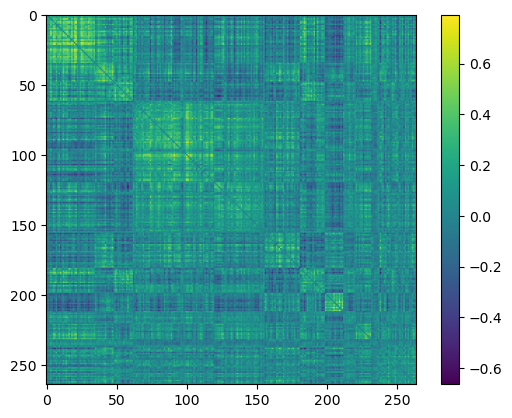

In [48]:
import matplotlib.pyplot as plt

one_minus_eye = np.ones((264,264))-np.eye(264)

plt.imshow(fc.getfcnp()[1]*one_minus_eye)
# plt.imshow(restmat[0])
# plt.imshow(vec2mat(fakemats[1223]))
plt.colorbar()
plt.show()

In [43]:
id1, id2 = np.triu_indices(264,1)
for i in range(10):
    err = rmse(fc.getfcnp()[i][id1, id2], rest[0], mean=np.mean)
    print(err)

for i in range(10):
    sim = cosine_similarity(rest[:1], fc.getfcnp()[i:i+1][:, id1, id2])
    print(sim)

0.2696919260012331
0.24626989660286852
0.2519449630596599
0.25747854985650825
0.2507149747827861
0.25320152679803254
0.2629486271840246
0.2516969836518783
0.2521163302631053
0.25255877565494983
[[0.21203163]]
[[0.34512612]]
[[0.32231004]]
[[0.27868923]]
[[0.31339226]]
[[0.3006317]]
[[0.2640225]]
[[0.31733099]]
[[0.30533306]]
[[0.30892316]]


In [45]:
err = rmse(rest[0], nback[0], mean=np.mean)
print(err)

from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(rest[:1], nback[:1]))

0.17303811938393235
[[0.72948123]]


In [358]:
import pickle

pickle.dump(fakemats, open('/home/anton/Documents/Tulane/Research/Work/Imputation/fake_emoid264_10.pkl', 'wb'))

print('Done')

Done


In [378]:
d.fc1.weight

Parameter containing:
tensor([[ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050,  0.0002],
        [ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050,  0.0023],
        [ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050, -0.0011],
        ...,
        [ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050, -0.0035],
        [ 0.0015,  0.0023, -0.0049,  ...,  0.0041,  0.0014, -0.0048],
        [-0.0035,  0.0010, -0.0023,  ...,  0.0039,  0.0014,  0.0040]],
       device='cuda:0', requires_grad=True)

In [63]:
fake_tgt

tensor(-0.0714, device='cuda:0')